In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import glob
import os

import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6]
import matplotlib.pyplot as plt

import utils
from add_fourier import get_fourier_fn

In [3]:
def read_file(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    df = pd.DataFrame.from_dict(data['data'])
    df.sort_values('lon', inplace=True)
#     df = df[df.obs_to_target < 6.0E7]
    return df

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


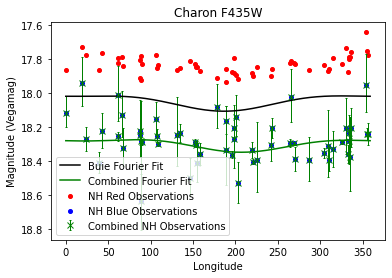

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


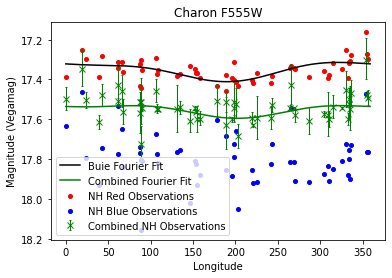

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


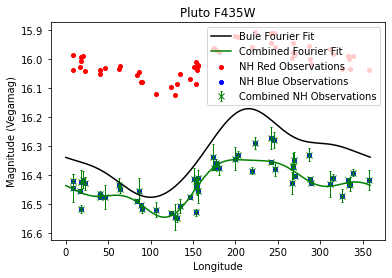

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


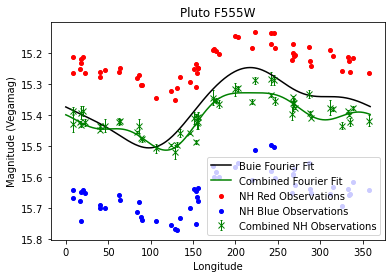

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


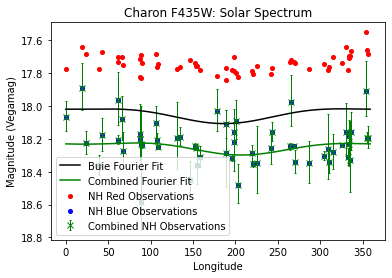

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


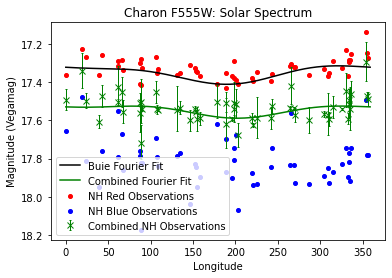

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


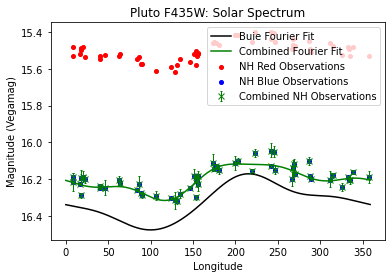

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


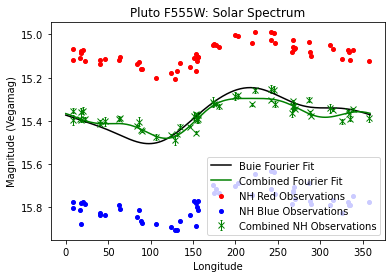

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


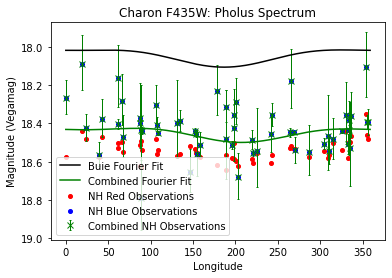

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


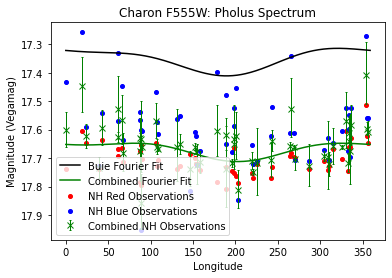

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


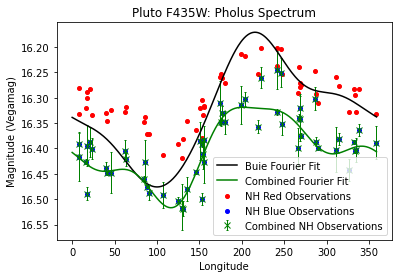

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


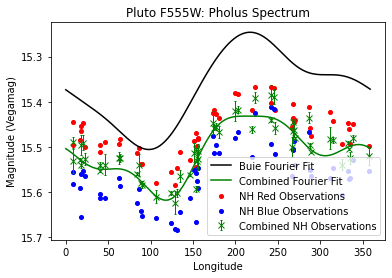

In [20]:
def show_curve(data_file, spec=None):
    target, bandpass = data_file.split("_")
        
    target = target.capitalize()
    bandpass = f"F{bandpass}W"
    plt.title(f"{target} {bandpass}{f': {spec.capitalize()} Spectrum' if spec is not None else ''}")

    
    filename = f"output/{data_file}{f'_{spec}' if spec is not None else ''}.json"
    df = read_file(filename)
    yerr = [df.multi_vegamag_sigma_plus, df.multi_vegamag_sigma_minus]


    plt.errorbar(df.lon, df.multi_vegamag, yerr=yerr, 
                 fmt='x', c='green', elinewidth=1, capsize=1,
                 label='Combined NH Observations')
    plt.scatter(df.lon, df.converted_vegamag_NH_RED,
                marker='o', s=4**2, c='red',
                label='NH Red Observations')
    plt.scatter(df.lon, df.converted_vegamag_NH_BLUE,
                marker='o', s=4**2, c='blue',
                label='NH Blue Observations')
    
    buie_x = np.arange(360)
    buie_y = get_fourier_fn(f"data/buie_fourier_{data_file}.json")(buie_x)
    plt.plot(buie_x, buie_y, c="black", label="Buie Fourier Fit")
    
    fit_x = np.arange(360)
    fit_y = get_fourier_fn(filename)(fit_x)
    plt.plot(fit_x, fit_y, c="green", label="Combined Fourier Fit")

    plt.xlabel("Longitude")
    plt.ylabel("Magnitude (Vegamag)")
    plt.legend()
    plt.gca().invert_yaxis()
    figname = f"{data_file}{f'_{spec}' if spec is not None else ''}.eps"
    plt.savefig(f"figures/{figname}", bbox_inches='tight')
    plt.show()

show_curve("charon_435")
show_curve("charon_555")
show_curve("pluto_435")
show_curve("pluto_555")
show_curve("charon_435", spec="solar")
show_curve("charon_555", spec="solar")
show_curve("pluto_435", spec="solar")
show_curve("pluto_555", spec="solar")
show_curve("charon_435", spec="pholus")
show_curve("charon_555", spec="pholus")
show_curve("pluto_435", spec="pholus")
show_curve("pluto_555", spec="pholus")

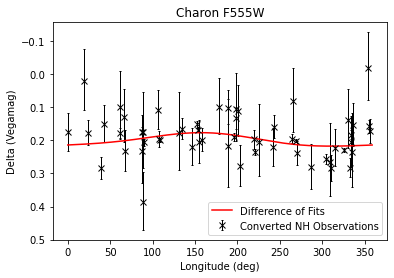

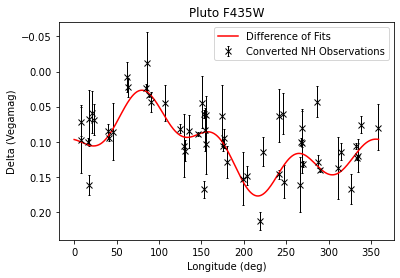

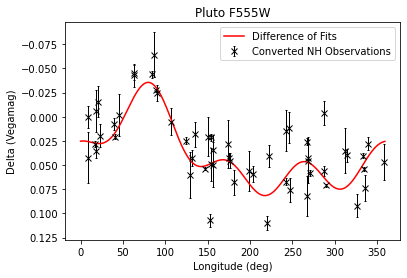

In [5]:
def show_err(data_file):
    target, bandpass = data_file.split("_")
    target = target.capitalize()
    bandpass = f"F{bandpass}W"
    plt.title(f"{target} {bandpass}")

    filename = f"output/{data_file}.json"
    df = read_file(filename)
    yerr = [df.multi_vegamag_buie_delta_sigma_plus, df.multi_vegamag_buie_delta_sigma_minus]


    plt.errorbar(df.lon, df.multi_vegamag_buie_delta, yerr=yerr, 
                 fmt='x', c='black', elinewidth=1, capsize=1,
                 label='Converted NH Observations')

    # Fits
    fit_x = np.arange(360)
    buie_y = get_fourier_fn(f"data/buie_fourier_{data_file}.json")(fit_x)
    fit_y = get_fourier_fn(filename)(fit_x)
    plt.plot(fit_x, fit_y-buie_y, c="red", label="Difference of Fits")

    plt.xlabel("Longitude (deg)")
    plt.ylabel("Delta (Vegamag)")
    plt.legend()
    plt.gca().invert_yaxis()
    figname = data_file + '_buie_delta.jpg'
    plt.savefig(f"figures/{figname}", bbox_inches='tight')
    plt.show()

    
# show_err("charon_435")
show_err("charon_555")
show_err("pluto_435")
show_err("pluto_555")